# CSC 363 - Farmingdale State College

## Module Assignment - Converting ERDs to SQL DDL

In this module, we'll look at how to build databases that encode relationships described in an ERD. Topics covered include:

- SQL Data Definition Language (SQL DDL)
- The use CHECK constraints to enforce restricted data ranges.
- The use of FOREIGN KEY and other constraint types to model relationships between entities/tables.

**HOW TO COMPLETE THIS ASSIGNMENT**
1. Open this notebook in Azure Data Studio. 
1. Complete all tasks.
    - When you first try to run a code cell, you will be prompted to connect to SQL Server.
        - You will need to be on a campus machine or connected to one via VMWare Horizon in order to connect to the department SQL Server.
    - Set authentication type to "SQL Login"
    - The server name is csserver2.it.farmingdale.edu
    - The user name is the part of your Farmingdale email address before the @farmingdale.edu.
    - Your password is your birthdate (mmddyy) followed by the last four digits of your RAM ID. If your birthday and RAM ID were May 1, 2002 and R123456789, then your password would be 0501026789.
    - Set "Database" to your user name (the part of your Farmingdale email address before the @farmingdale.edu).
1. **Run** the code cells.
    - The code cells must successfully run and not throw an error!
    - In order to give you credit for the assignment, I **must** see that you actually ran your code!
1. Save the notebook.
1. Submit two files in Brightspace:
   - The .ipynb notebook file.
   - A single PDF containing screenshots showing that you completed each task, i.e., showing the output of all code cells.




### **Task #0a**
Depending on how you configured your connection, the current "database context" (the database against which your queries run by default) may not be *your* database. If the database context isn't set to your database, you may get errors when attempting to modify the database, since you don't have permission to do so. 

**The task:** Make sure that the database context is set to your database by modifying and running the following cell. Your database has the same name as your username (the part before @farmingdale.edu in your email address).

You can do this using USE followed by your database name:

```USE <your_database_name>```

For example, I would run: 

```USE crainj```

You do not need to submit a screenshot for this task.

In [ ]:
-- Replace <your_database_name>. It's the part before @farmingdale.edu in your email address.
-- Then, execute this cell.
USE yaghs

### **Task #0b**
In assignments which involve creating tables, you'll generally want to create a separate schema in your database and create the tables in that schema. Schemas act like a separate namespace, reducing conflicts between tables and other database objects with the same name. It's also just a helpful way to keep your database organized.

**The task:** Create a schema for this module. For instance, if this is module 05, then create a schema called 'module05'. See the following link for information about schemas and examples of creating one. [https://www.sqlservertutorial.net/sql-server-basics/sql-server-create-schema/](https://www.sqlservertutorial.net/sql-server-basics/sql-server-create-schema/)

Then, when you create tables (or other database objects) for this assignment, create them in this schema. For example:

```CREATE TABLE module05.my_table(my_attribute INT);```

Note how the schema name is specified as part of the CREATE TABLE statement.

You do not need to submit a screenshot for this task.

In [2]:
-- Enter your code in this cell. Then, execute the cell.
CREATE SCHEMA m5
CREATE TABLE m5.my_table(my_attribute INT);

Commands completed successfully.

Total execution time: 00:00:00.006

### **Task #1**
**The task:** Write and execute SQL DDL for the following ERD. Implement all entities and relationships.

Additionally, enforce the format of ram_id (the letter R followed by 9 digits)

Hint: notice that Pet is a weak entity.

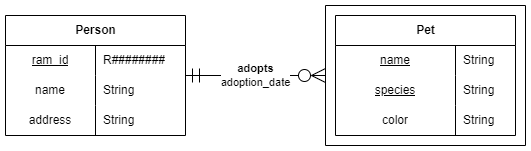

In [3]:
-- Enter your code in this cell. Then, execute the cell.
CREATE TABLE m5.person(
    ram_id CHAR(9)
    ,[name] VARCHAR(50)
    ,[address] VARCHAR(MAX)
    ,CONSTRAINT pk_person PRIMARY KEY(ram_id)
    ,CONSTRAINT check_person_ram CHECK(ram_id LIKE '[R][0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]')
)

CREATE TABLE m5.pet(
    name CHAR(250)
    ,species CHAR(15)
    ,color CHAR(30)
    ,owner_ram_id CHAR(9)
    ,adoption_date DATE
    ,CONSTRAINT pk_pet PRIMARY KEY(name, species, owner_ram_id)
    ,CONSTRAINT fk_adopted_by FOREIGN KEY(owner_ram_id) REFERENCES m5.person(ram_Id)
)

Commands completed successfully.

Total execution time: 00:00:00.023

### **Task 2a**
**The task:** Write and execute SQL DDL for the following ERD. Implement all entities and relationships.

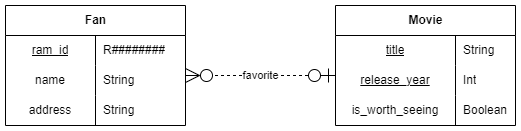

In [15]:
-- Enter your code in this cell. Then, execute the cell.
CREATE TABLE m5.movie(
    title CHAR(500)
    , release_year INT
    ,is_worth_seeing BIT NOT NULL DEFAULT 0
    ,CONSTRAINT pk_movie PRIMARY KEY(title, release_year)
)

CREATE TABLE m5.fan(
    ram_id CHAR(9)
    ,[name] VARCHAR(50)
    ,[address] VARCHAR(MAX)
    ,fav_title CHAR(500)
    ,fav_release_year INT
    ,CONSTRAINT pk_fan PRIMARY KEY(ram_id)
    ,CONSTRAINT check_person_ram CHECK(ram_id LIKE '[R][0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]')
    ,CONSTRAINT fk_favorite_movie FOREIGN KEY(fav_title,fav_release_year) REFERENCES m5.movie(title, release_year)
)


: Msg 2714, Level 16, State 5, Line 9
There is already an object named 'check_person_ram' in the database.

: Msg 1750, Level 16, State 1, Line 9
Could not create constraint or index. See previous errors.

Total execution time: 00:00:00.007

In [14]:
DROP TABLE IF EXISTS m5.movie
DROP TABLE IF EXISTS m5.fan

Commands completed successfully.

Total execution time: 00:00:00.001

### **Task 2b**
The following ERD is nearly the same as the previous ERD, except that the *favorite* relationship has been modified. Notice that it is now mandatory for a Fan to have a favorite Movie.

**The task:** Modify your table(s) to enforce the minimum cardinality of the *favorite* relationship. Use ALTER TABLE statement(s).

[https://stackoverflow.com/questions/689746/altering-a-column-null-to-not-null](https://stackoverflow.com/questions/689746/altering-a-column-null-to-not-null)

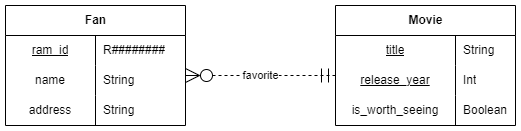

In [ ]:
-- Enter your code in this cell. Then, execute the cell.

### **Task 3**
**The task:** Write and execute SQL DDL for the following ERD. Implement all entities and relationships.

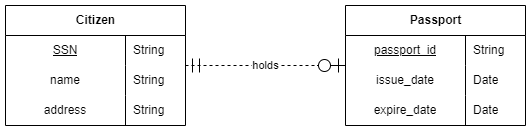

In [ ]:
-- Enter your code in this cell. Then, execute the cell.

### **Task 4**
**The task:** Write and execute SQL DDL for the following ERD. Implement all entities and relationships.

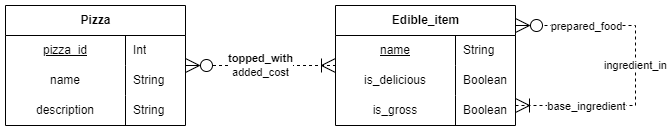

In [ ]:
-- Enter your code in this cell. Then, execute the cell.

### **Task 5**
The following ERD models the NYC restaurant inspection dataset. 

**The task:** Write and execute SQL DDL for the ERD. Implement all entities and relationships.

Select appropriate data types. To review the range of data types available in MSSQL, you may wish to review the following resources:

[https://learn.microsoft.com/en-us/sql/t-sql/data-types/data-types-transact-sql?view=sql-server-ver16](https://learn.microsoft.com/en-us/sql/t-sql/data-types/data-types-transact-sql?view=sql-server-ver16)

[https://www.sqlservertutorial.net/sql-server-basics/sql-server-data-types/](https://www.sqlservertutorial.net/sql-server-basics/sql-server-data-types/)

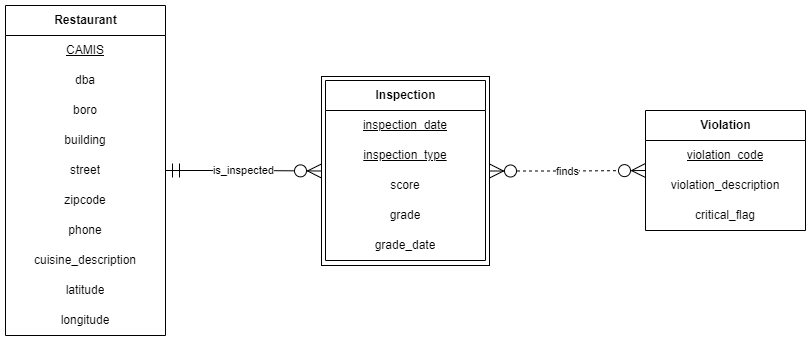

In [ ]:
-- Enter your code in this cell. Then, execute the cell.